In [4]:
import os
import re 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import manifold
from sklearn.cluster import KMeans,OPTICS,DBSCAN
import sklearn
import matplotlib.cm as cm
import torch
import nibabel as nib
import scipy as sc
import matplotlib.animation as animation


## Display TimeSeries

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
Saved at /neurospin/lbi/monkeyfmri/deepstim/workspace/2023_ASM_tembedding/gitproject/2023_asm_tembedding/data/visuals/brainmovie0_awake_with_confounds.mp4


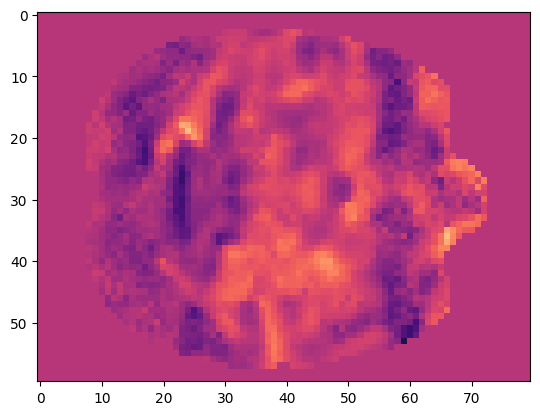

In [34]:
n = 47
rows = n // 5 + 1
columns = 5

test_load = nib.load("/neurospin/lbi/monkeyfmri/deepstim/workspace/2023_ASM_tembedding/gitproject/2023_asm_tembedding/data/TimeSeries/0.001-0.01-addcompor-False/sub-jade_ses-20120907_task-rest_space-mni_run-011_desc-smask_bold.nii.gz").get_fdata()

# ims is a list of lists, each row is a list of artists to draw in the
# current frame; here we are just animating one artist, the image, in
# each frame

ims = []
fig, axs = plt.subplots(1, 1)
for t in range(496):
    if t % 10 == 0:
        print(t)
    for i in [22]:
        # showing image
        #axs[i,j].title(i)
        #axs[i].axis('off')
        #im = axs[i].imshow(test_load[:,:,i,t],cmap = "bwr",animated = True,vmin=-1, vmax=1)
        im = axs.imshow(test_load[:,:,i,t],cmap = "magma",animated = True, vmin = -2, vmax = 2)
    ims.append([im])

ani = animation.ArtistAnimation(fig, ims, interval=100, blit=True,
                                repeat_delay=1000)

ani.save("/neurospin/lbi/monkeyfmri/deepstim/workspace/2023_ASM_tembedding/gitproject/2023_asm_tembedding/data/visuals/brainmovie{}.mp4".format("0_awake_with_confounds"))
print("Saved at /neurospin/lbi/monkeyfmri/deepstim/workspace/2023_ASM_tembedding/gitproject/2023_asm_tembedding/data/visuals/brainmovie{}.mp4".format("0_awake_with_confounds"))

# To save the animation, use e.g.
#
# ani.save("movie.mp4")
#
# or
#
# writer = animation.FFMpegWriter(-remvoe_confounds
#     fps=15, metadata=dict(artist='Me'), bitrate=1800)
# ani.save("movie.mp4", writer=writer)

plt.show()

## Display DFC

In [7]:
dfc = np.load('/neurospin/lbi/monkeyfmri/deepstim/workspace/2023_ASM_tembedding/gitproject/2023_asm_tembedding/data/DFCs/0.001-0.01-addcompor-False/dfc.npy')
meta = pd.read_csv("/neurospin/lbi/monkeyfmri/deepstim/workspace/2023_ASM_tembedding/gitproject/2023_asm_tembedding/data/DFCs/0.001-0.01-addcompor-False/meta.csv")

In [25]:
meta.iloc[10]

Unnamed: 0          10
monkey            jade
ses           20120907
run                 11
condition        awake
Name: 10, dtype: object

KeyboardInterrupt: 

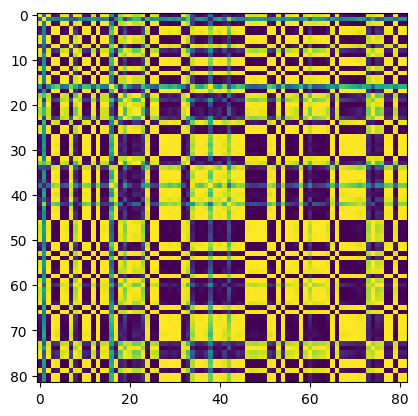

In [21]:
n_wins = dfc.shape[1]
session = 100
ims = []
fig, ax = plt.subplots()
for i in range(n_wins):
    im = ax.imshow(dfc[session,i,:,:], animated=True)
    #if i == 0:
    #    ax.imshow(C[i,:,:])  # show an initial one first
    ims.append([im])

ani = animation.ArtistAnimation(fig, ims, interval=100, blit=True,
                                repeat_delay=1000)

fig.colorbar(im, ax=ax)

ani.save("/neurospin/lbi/monkeyfmri/deepstim/workspace/2023_ASM_tembedding/gitproject/2023_asm_tembedding/data/visuals/movie{}.mp4".format("test_conscious"))
print("Saved at /neurospin/lbi/monkeyfmri/deepstim/workspace/2023_ASM_tembedding/gitproject/2023_asm_tembedding/data/visuals/movie{}.mp4".format("test_conscious"))

# To save the animation, use e.g.
#
# ani.save("movie.mp4")
#
# or
#
# writer = animation.FFMpegWriter(
#     fps=15, metadata=dict(artist='Me'), bitrate=1800)
# ani.save("movie.mp4", writer=writer)

plt.show()